<a href="https://colab.research.google.com/github/Ilyass-Dahaoui/Artificial-neural-networks-Project-for-predecting-the-energy-of-photovolatics-pannels/blob/main/TP1_Linear_regression_and_random_forest_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import sklearn.metrics as metrics
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [3]:
Data = pd.read_csv("/content/dataTP.txt",delimiter='\t')
Data.head()

,Hour,PAC,Tm,Tamb,TOA,GHI
0,10,3802.507576,42.347879,14.50,6181.305,4278.672
1,11,3059.995455,55.044545,15.98,7261.285,5195.536
2,12,5104.446970,67.297576,17.46,7637.228,5525.204
3,13,5095.312121,77.016667,18.24,7283.514,5236.036
4,14,4968.204545,80.223030,18.45,6224.230,4346.761


In [4]:
#Target and features
y=Data.PAC
x=Data.drop('PAC',axis=1)
print(y)

0       3802.507576
1       3059.995455
2       5104.446970
3       5095.312121
4       4968.204545
           ...     
9389       0.000000
9390       0.000000
9391     107.551515
9392    1940.751515
9393    4286.525038
Name: PAC, Length: 9394, dtype: float64


In [5]:
#split data
x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y,test_size=2348,random_state=100)

**Linear regression Model**

In [6]:
model = LinearRegression()
# optimisation du modèle: détermination des paramètres de la régression Linéaire par La méthode des moindres carré
model.fit(x_train, y_train)


LinearRegression()

In [7]:
print(model.intercept_)


954.7675050216023


In [8]:
print(model.coef_)

[-101.8235949    62.21442013  -74.37406875   -0.14068962    0.48173185]


In [9]:
rsq = metrics.r2_score(y_train, model.predict(x_train))
print(f"Coefficient de détermination R2 en apprentissage (train) : {rsq:.2f}")


Coefficient de détermination R2 en apprentissage (train) : 0.84


In [13]:
rsq = metrics.r2_score(y_test, model.predict(x_test))
print(f"Coefficient de détermination R2 en validation (test) : {rsq:.2f}")


Coefficient de détermination R2 en validation (test) : 0.84


on constate qu'on a eu le meme score R2

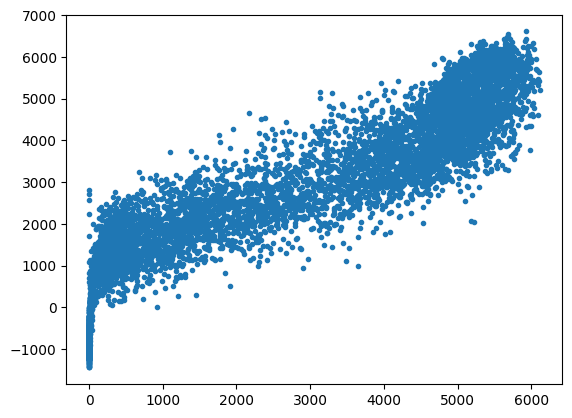

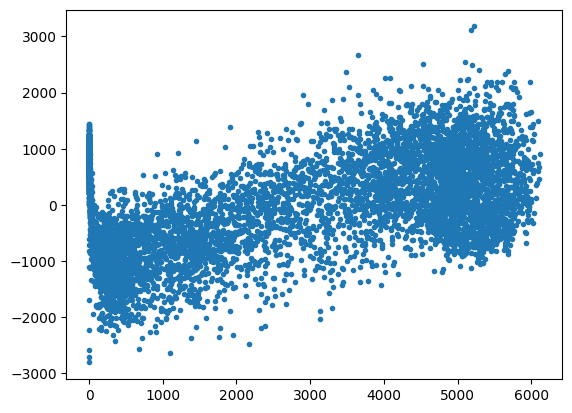

In [14]:

plt.plot(y_train, model.predict(x_train),'.')
plt.show()

plt.plot(y_train, y_train-model.predict(x_train),'.')
plt.show()

on constate d'après les deux figures que la distribution des données suivent une distribution linéaire donc on pourrait faire une regression linéaire

In [15]:
#l’erreur quadratique moyenne du modèle sur les données d’apprentissage et ensuite sur les données de test
mse_train = mean_squared_error(y_train, model.predict(x_train))
print(f"Erreur quadratique moyenne sur les données d'apprentissage : {mse_train}")

Erreur quadratique moyenne sur les données d'apprentissage : 726139.57487874


In [16]:
mse_test = mean_squared_error(y_test, model.predict(x_test))
print(f"Erreur quadratique moyenne sur les données de test : {mse_test}")

Erreur quadratique moyenne sur les données de test : 706850.2677139348


**Random Forest Model**

In [18]:
# Create the model with 10 trees
model = RandomForestRegressor(n_estimators = 10, random_state = 10, bootstrap = True)

In [22]:
# Fit on training data
model.fit(x_train, y_train)
y_pred=model.predict(x_test)

In [24]:
rsq=metrics.r2_score(y_train,model.predict(x_train))
print("le R2 sur le jeu d'entrainement est", rsq)

le R2 sur le jeu d'entrainement est 0.9902000423671912


In [26]:
rsq=metrics.r2_score(y_test,model.predict(x_test))
print("le R2 sur le jeu de test est", rsq)

le R2 sur le jeu de test est 0.9453082506271011


<ipython-input-27-e0a093430b35>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
<ipython-input-27-e0a093430b35>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax

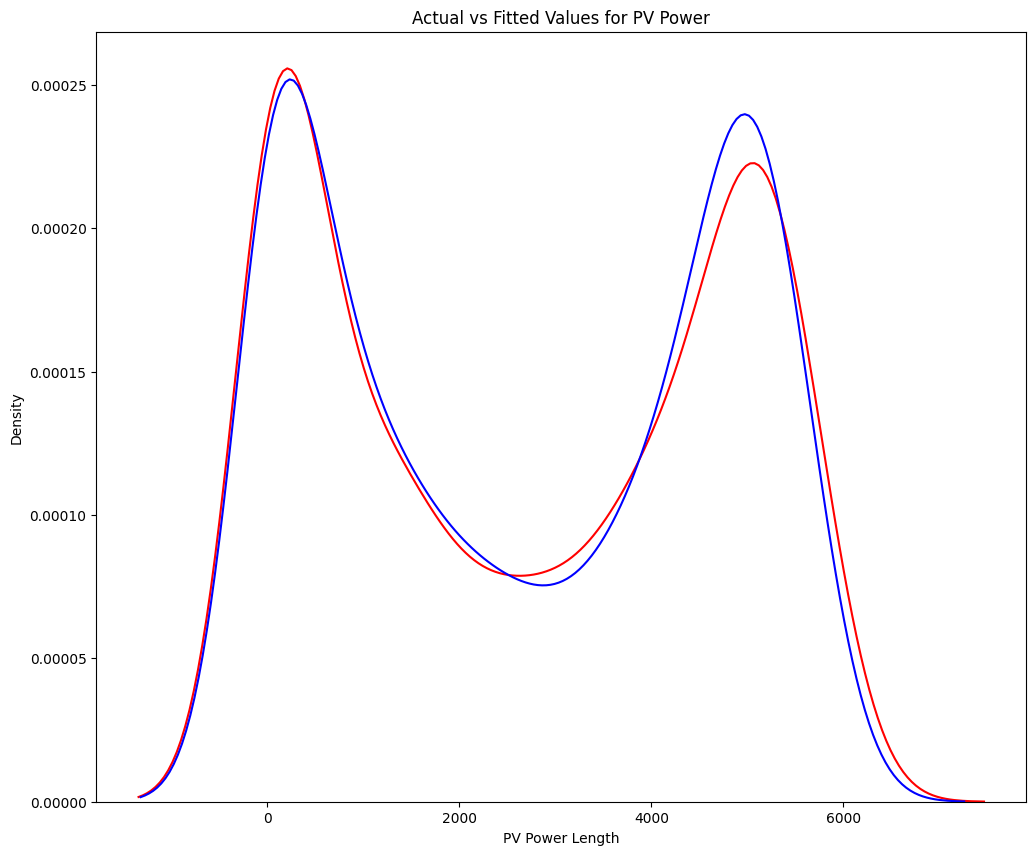

In [27]:
width = 12
height = 10
plt.figure(figsize=(width, height))
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('Actual vs Fitted Values for PV Power')
plt.xlabel('PV Power Length')
plt.show()
plt.close()


le modèle a appris efficacement les relations entre les caractéristiques et l'étiquette cible, produisant des prédictions qui correspondent étroitement aux valeurs réelles.


In [28]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f"RMSE sur les données d'apprentissage : {rmse_train:.2f}")
print(f"RMSE sur les données de test : {rmse_test:.2f}")

RMSE sur les données d'apprentissage : 209.64
RMSE sur les données de test : 493.17


In [29]:
Data.PAC.describe()

count    9394.000000
mean     2728.996212
std      2115.746883
min         0.000000
25%       442.413345
50%      2791.191526
75%      4861.013259
max      6124.527273
Name: PAC, dtype: float64

In [30]:
pd.DataFrame(model.feature_importances_,index = x_train.columns,columns = ["importance"]) . sort_values("importance",ascending = False)

,importance
GHI,0.646805
Tm,0.258789
Hour,0.040958
Tamb,0.037429
TOA,0.016019


on voit bien que le paramètre le plus important est celui  GHI et le moins important est celui TOA

après avoir testé plusieurs valeurs du nombre des estimateurs on conclut quela performance d' un modèle Random Forest tend à augmenter avec l'ajout d'estimateurs et à diminuer avec leur diminution

In [31]:
parameters = {'n_estimators': [10, 50, 100, 200, 300]}
regr = RandomForestRegressor(random_state=10, bootstrap = True)
model = GridSearchCV(regr, parameters)
model.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=10),
             param_grid={'n_estimators': [10, 50, 100, 200, 300]})

In [32]:
rsq=metrics.r2_score(y_test,model.predict(x_test))
print("le R2 sur le jeu de test est", rsq)
rsq=metrics.r2_score(y_train,model.predict(x_train))
print("le R2 sur le jeu d'entrainement est", rsq)

le R2 sur le jeu de test est 0.9506036629196117
le R2 sur le jeu d'entrainement est 0.9931624130854196


après avoir appliqué la méthode Gridsearch on voit bien le R2 est augmenté